<a href="https://colab.research.google.com/github/trachtok/dspracticum2020_data/blob/main/assignment03/assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN model on Fashion MNIST dataset

*Kája Trachtová, Michaela Kecskéková, Martin Špilar, Dagmar Al Tukmachi*

+ goal of this assignment is to play with a CNN model on Fashion MNIST dataset to get the best accuracy
+ calculate the *confusion matrix* and find out which pair of fashion items is the most often misclassified
+ plot top 16 predictions that model is the most sure about but are actually wrong

### Workflow of this notebook

1. Load libraries
2. Read input data
3. Normalize data prior to model training
4. Create CNN model
5. Prediction on test data and model evaluation
6. Plot misclassified images

## Load libraries

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import confusion_matrix

print(tf.__version__)

2.3.0


## Read input data

In [3]:
# load Fashion MNIST from Keras repo
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# add extra dimension (to have one channel)
x_train = x_train[:,:,:,None]
x_test = x_test[:,:,:,None]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

4423680/4422102 [==============================] - 0s 0us/step


((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [4]:
clothes_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Normalize data

In [5]:
# Normalize values from [0, 255] to [0, 1] interval
x_train = x_train / 255
x_test = x_test / 255

# creating 10 categories
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

y_train.shape

(60000, 10)

# CNN model

In [35]:
cnn_model = keras.Sequential([
      layers.Conv2D(input_shape=(28,28,1), filters = 32, kernel_size = (3,3), activation = 'relu'),
      layers.Dropout(0.5),
      layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
      layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(10, activation='softmax')
])

cnn_model.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)       36992     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        73792     
_________________________________________________________________
flatten_1 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [36]:
history = cnn_model.fit(
  x_train, y_train,
  batch_size = 256,
  epochs = 10,
  validation_data = (x_test, y_test),
  verbose = 1
)

Epoch 1/10
235/235 [==============================] - 574s 2s/step - loss: 0.5972 - accuracy: 0.7880 - val_loss: 0.3590 - val_accuracy: 0.8665
Epoch 2/10
235/235 [==============================] - 562s 2s/step - loss: 0.3727 - accuracy: 0.8664 - val_loss: 0.3047 - val_accuracy: 0.8914
Epoch 3/10
235/235 [==============================] - 569s 2s/step - loss: 0.3118 - accuracy: 0.8869 - val_loss: 0.2659 - val_accuracy: 0.9046
Epoch 4/10
235/235 [==============================] - 566s 2s/step - loss: 0.2690 - accuracy: 0.9025 - val_loss: 0.2707 - val_accuracy: 0.8991
Epoch 5/10
235/235 [==============================] - 564s 2s/step - loss: 0.2419 - accuracy: 0.9122 - val_loss: 0.2500 - val_accuracy: 0.9082
Epoch 6/10
235/235 [==============================] - 564s 2s/step - loss: 0.2173 - accuracy: 0.9185 - val_loss: 0.2463 - val_accuracy: 0.9138
Epoch 7/10
235/235 [==============================] - 563s 2s/step - loss: 0.1990 - accuracy: 0.9265 - val_loss: 0.2339 - val_accuracy: 0.9205

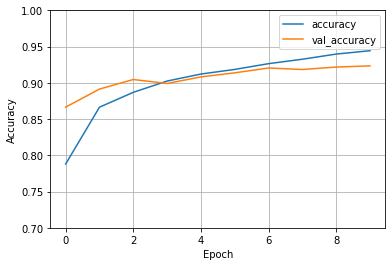

In [44]:
def plot_loss(history, ylim=(0,1)):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  
plot_loss(history, ylim=(0.7, 1))

## Prediction on test data and model evaluation

+ make predictions on test data (10,000 images) using created model

In [39]:
# make predictions on test data
test_predictions = cnn_model.predict(x_test,batch_size=126)
# create multidimensional array for predictions
y_pred = keras.utils.to_categorical(np.argmax(test_predictions, axis=1), 10)

### Confusion matrix

+ as the most often misclassified was the pair T-shirt/top VS Shirt

In [40]:
# confusion matrix converted into a data frame with row and column names 
column_names = clothes_labels
row_names = clothes_labels

cm = confusion_matrix(y_true = np.argmax(y_test, axis=1), y_pred = np.argmax(test_predictions, axis=1))
cm = pd.DataFrame(cm, columns=column_names, index=row_names)

# most misclassified = T-shirt/top vs. Shirt
pd.DataFrame(cm)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None): print(cm)

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,910,2,15,11,1,0,55,0,6,0
Trouser,2,978,0,14,1,0,3,0,2,0
Pullover,18,0,905,10,31,0,36,0,0,0
Dress,9,0,14,945,14,0,18,0,0,0
Coat,1,1,60,37,849,0,51,0,1,0
Sandal,0,0,0,0,0,987,0,7,0,6
Shirt,118,1,61,26,50,0,737,0,7,0
Sneaker,0,0,0,0,0,8,0,972,0,20
Bag,1,1,2,5,1,1,1,2,986,0
Ankle boot,0,0,0,0,0,5,1,29,0,965


## Plot misclassified images

+ extract top16 images where model was the most sure of label but were actually misclassified



In [41]:
# get matrix of differences between predictions and real labels
difference = test_predictions - y_test
# get index of top16 misclassified images that model was the most sure about but were actually incorrect
most_false_idx = pd.DataFrame(np.max(difference, axis = 1), index=[x for x in range(len(difference))]).sort_values(by = 0, ascending = False)[:16].index

In [65]:
misclassified = len([i for i, x in enumerate((y_test == y_pred).all(axis=1)) if x == False])
print("Number of misclassified images: ", misclassified)
print("Accuracy on testing data: ",str(100-(misclassified/len(y_test)*100)))

Number of misclassified images:  766
Accuracy on testing data:  92.34


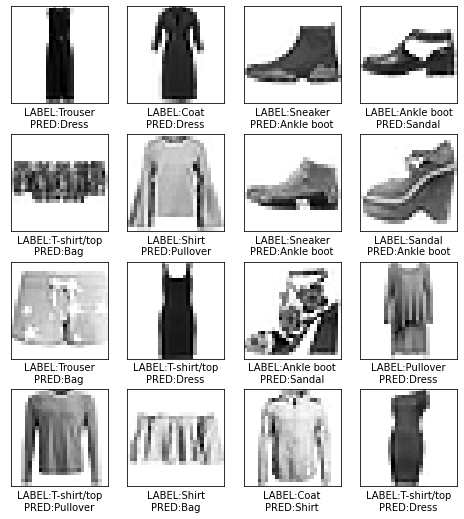

In [64]:
# get original train/test data for plotting images
(xplt_train, yplt_train), (xplt_test, yplt_test) = fashion_mnist.load_data()

def plot_image(x, title = ""):
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x, cmap=plt.cm.binary)
  plt.xlabel(title)

plt.figure(figsize=(8,9))
for i in range(16):
  plt.subplot(4,4, i + 1)
  plot_image(xplt_test[most_false_idx[i]].squeeze(), 
             "LABEL:"+clothes_labels[yplt_test[most_false_idx[i]]]+"\n"+"PRED:"+clothes_labels[np.argmax(y_pred[most_false_idx],axis=1)[i]])

+ BONUS: extract top16 misclassified images where model put the smallest probability to actually correct labels, it is interesting to compare to previous misclassified images and see why model was not able to classify them correctly
+ these 16 images are basically the most weird ones where model was absolutely not able to classify them with correct label
+ some of the images are shared with top16 misclassified images where model was the most sure in incorrect label (and in this case also put the smallest probability to correct label)

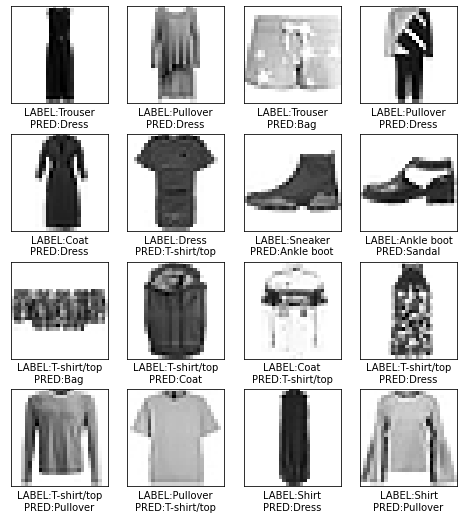

In [66]:
# get index of top16 misclassified images where model was least sure on the actually correct label
least_false_idx = pd.DataFrame(np.min(difference, axis = 1), index=[x for x in range(len(difference))]).sort_values(by = 0)[:16].index 

plt.figure(figsize=(8,9))
for i in range(16):
  plt.subplot(4,4, i + 1)
  plot_image(xplt_test[least_false_idx[i]].squeeze(), 
             "LABEL:"+clothes_labels[yplt_test[least_false_idx[i]]]+"\n"+"PRED:"+clothes_labels[np.argmax(y_pred[least_false_idx],axis=1)[i]])

In [142]:
# NOT USED
# values_false_pred = list(map(max, test_predictions[false_idx]))

# indeces of items that were misclassified
# false_idx = [i for i, x in enumerate((y_test == y_pred).all(axis=1)) if x == False]